In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.signal as signal


In [7]:
# Data is in ./data folder in this convention for the filename
# <session_number>_<shoes_name>_<coating>.csv
# e.g. 001_newbalance_bitume.csv
# Now we can load the data with pandas
# We can use the read_csv function
def get_files():
    files = os.listdir('./data')
    return files

def parse_filename(filename):
    filename = filename.replace('.csv', '')
    session, shoes, coating = filename.split('_')
    return session, shoes, coating;

def load_data(filename):
    df = pd.read_csv('./data/' + filename)
    return df

channel_offsets = {
    'Channel 1': 36.98,
    'Channel 2': 196.34,
    'Channel 3': 69.57,
    'Channel 4': -107.74,
}

def get_all_data():
    files = get_files()
    data = []
    for file in files:
        if not file.endswith('.csv'):
            continue
        session, shoes, coating = parse_filename(file)
        df = load_data(file)
        # Change the time column from an interval to actual time, we use the cumsum function
        df['Time'] = np.cumsum(df['Time'])
        # Now find the minimum value of each channel and substract it to the channel
        for channel in ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']:
            df[channel] = df[channel] - channel_offsets[channel]


        data.append((session, shoes, coating, df))
    # Order the data by shoes and coating
    data = sorted(data, key=lambda x: (x[1], x[2]))
    
    return data

datas = get_all_data()
len (datas)

6

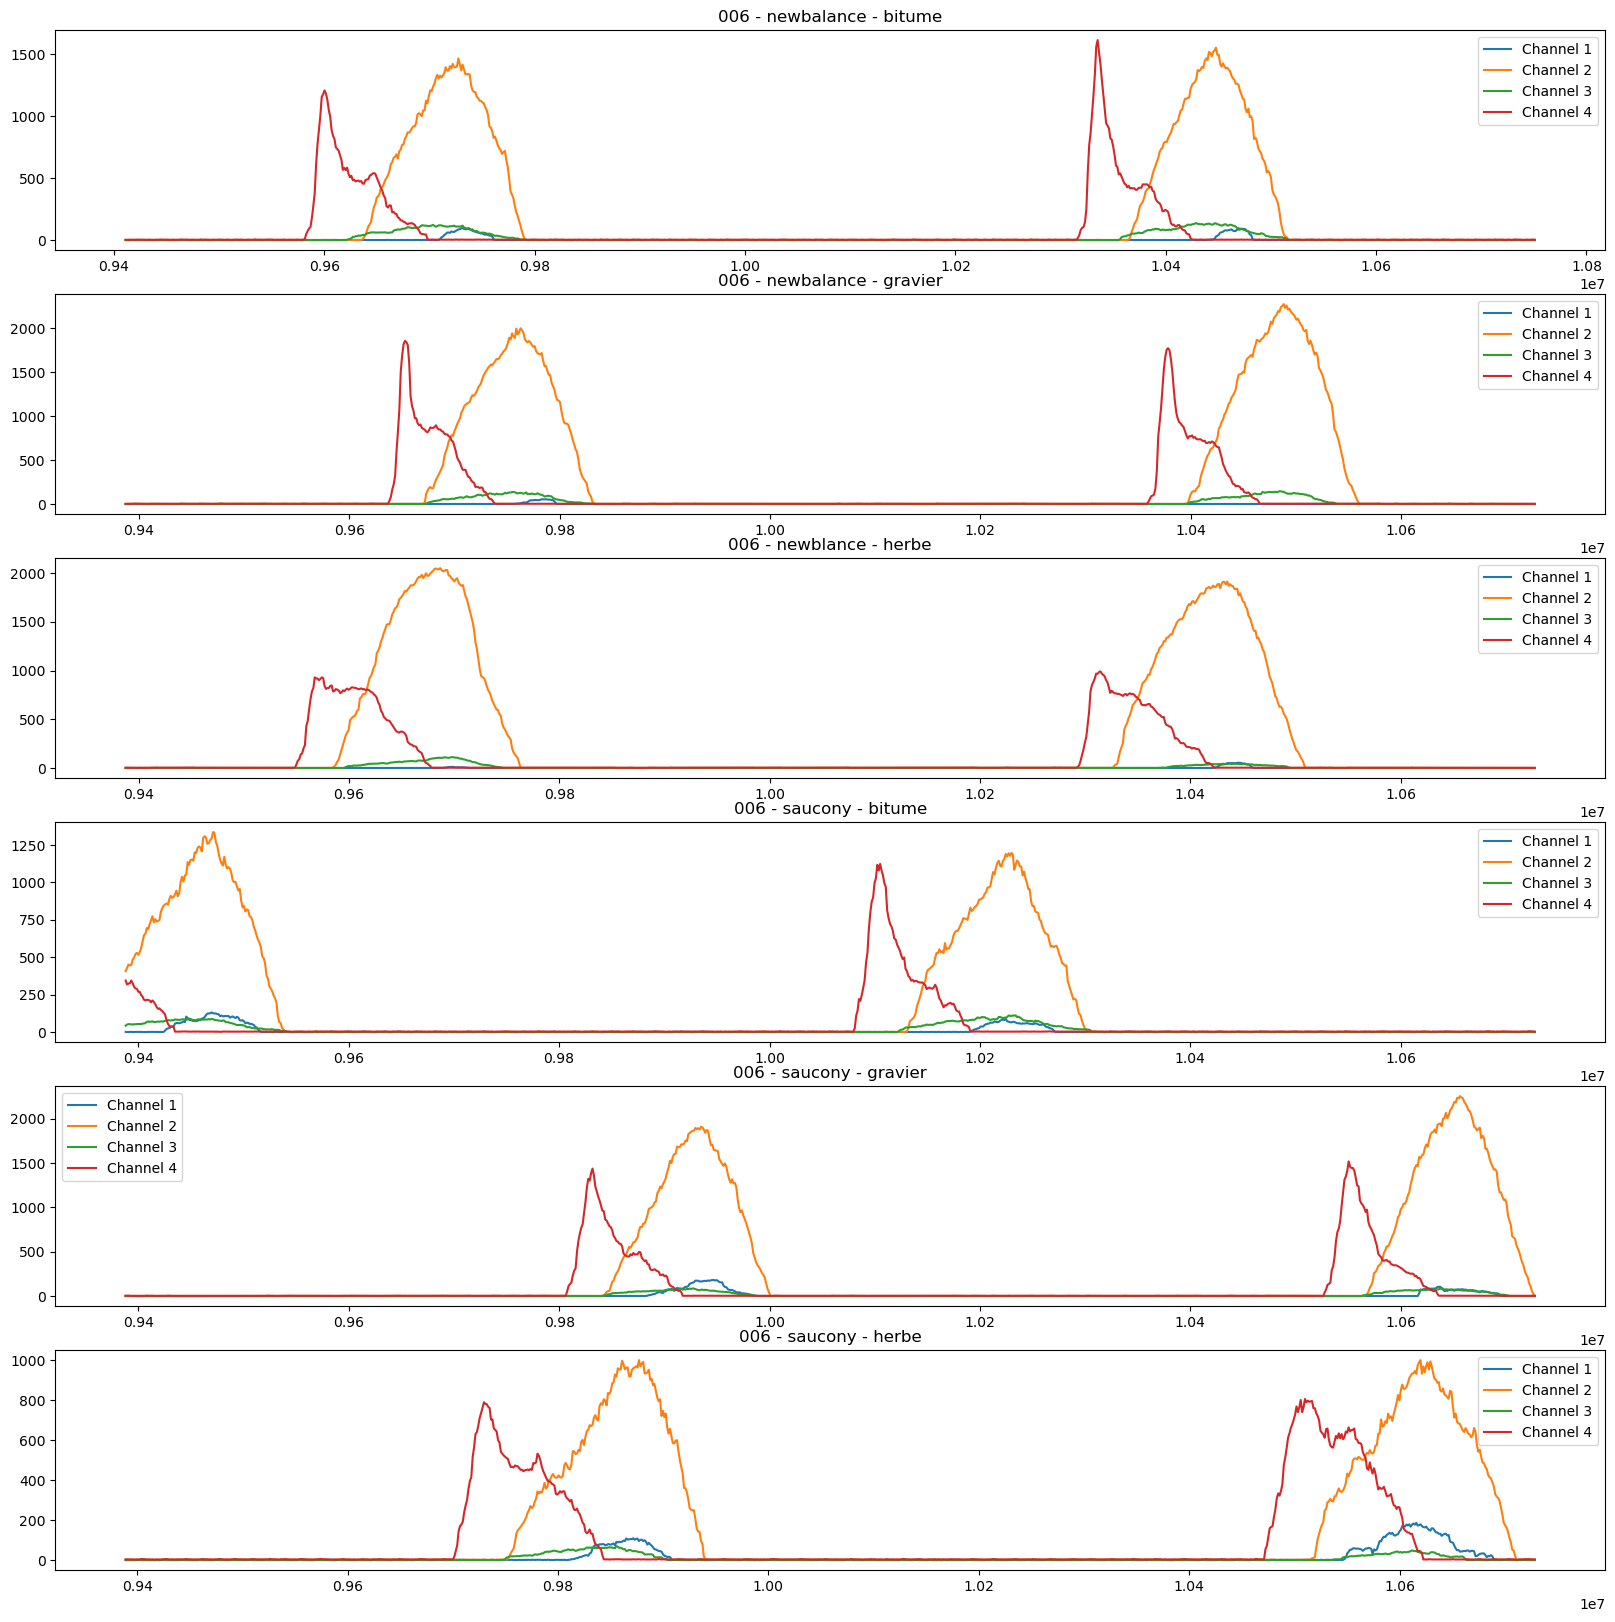

In [8]:
def plot_data(data):
    # Plot in subplots for each entry
    fig, axs = plt.subplots(len(data), 1, figsize=(20, 20))
    for i, (session, shoes, coating, df) in enumerate(data):
        for channel in ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']:
            df_trim = df[7000:8000]
            axs[i].plot(df_trim['Time'], df_trim[channel], label=channel)
        axs[i].set_title(f'{session} - {shoes} - {coating}')
        axs[i].legend()

plot_data(datas)

/home/malaury/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/malaury/.local/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/malaury/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/malaury/.local/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/malaury/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/malaury/.local/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret

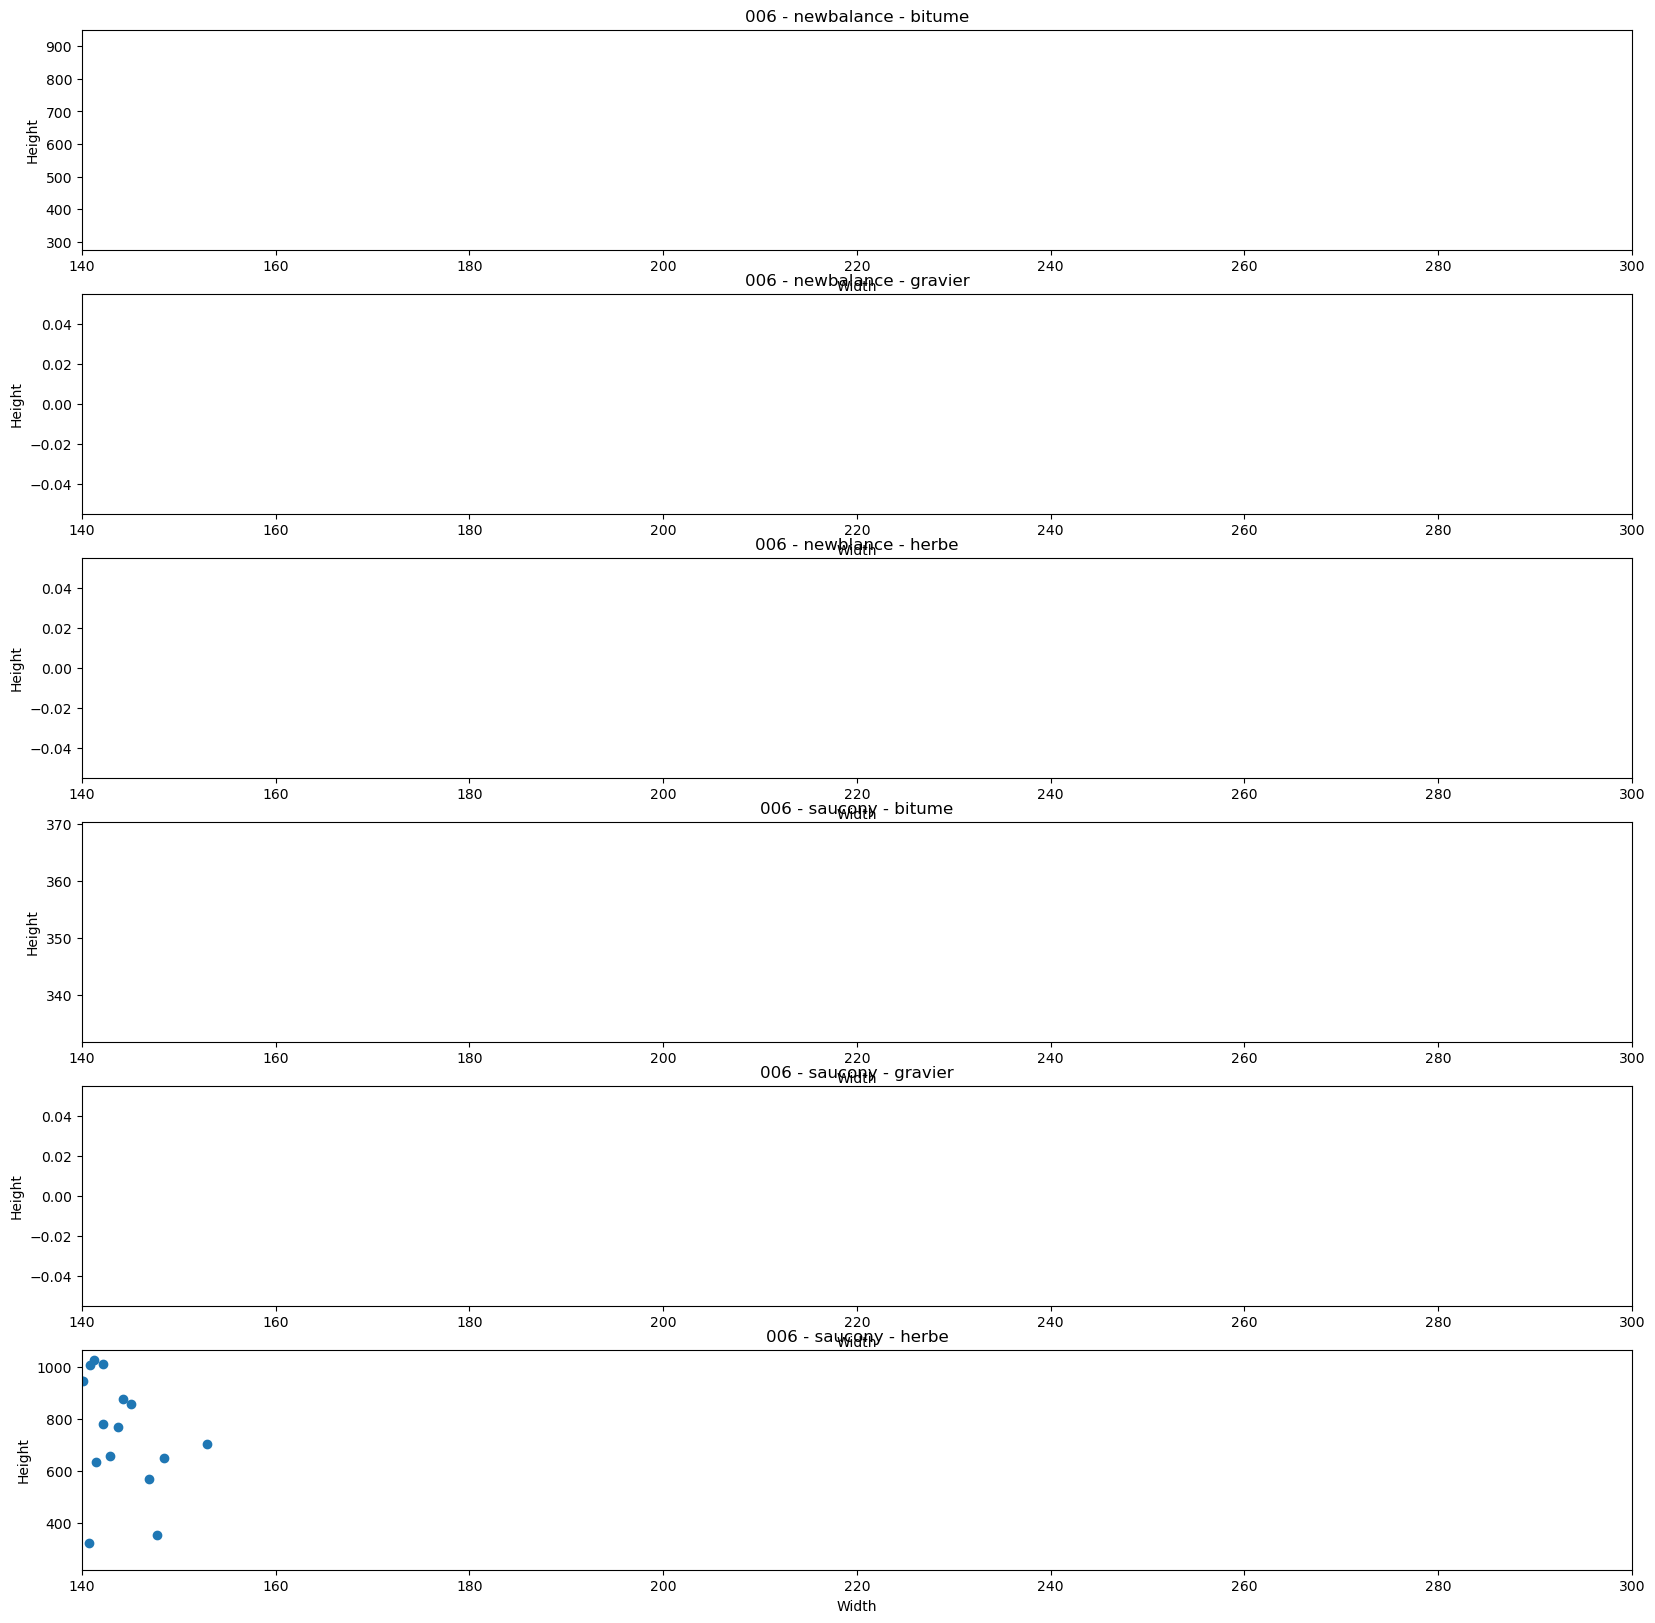

In [9]:
# Dow the same for other samples
def plot_data(data):
    # Plot in subplots for each entry
    fig, axs = plt.subplots(len(data), 1 , figsize=(20, 20))
    for i, (session, shoes, coating, df) in enumerate(data):
        df_trim = df[0:-20000]
        peaks, _ = signal.find_peaks(df_trim['Channel 1'], height=250, prominence=100, width=50)

        widths = signal.peak_widths(df_trim['Channel 1'], peaks, rel_height=0.95)
        mean_width = np.mean(widths[0])
        mean_height = np.mean(df_trim['Channel 1'][peaks])
        axs[i].scatter(widths[0],df_trim['Channel 1'][peaks])
        axs[i].plot(mean_width, mean_height, 'Xr')
        axs[i].set_title(f'{session} - {shoes} - {coating}')
        axs[i].set_xlabel('Width')
        axs[i].set_ylabel('Height')
        axs[i].set_xlim(140, 300)
    plt.show()

plot_data(datas)